### Instructor Demo: Financial Forecasting Part II

This program executes `1000` simulations of stock price trajectory over the next `252 * 3` trading days (or 3 years of trading) for `TSLA` stock, based on a normal probability distribution of average daily returns derived from the sample mean and standard deviation. Then, the program calculates a `95%` confidence interval of stock price outcomes for `TSLA`. 

In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import matplotlib.pyplot as plt
%matplotlib inline

### Check Available Tickers from IEX Cloud API

In [2]:
# Return available tickers from API
tickers=pd.DataFrame(get_symbols())
tickers.head()

,date,iexId,isEnabled,name,symbol,type
0,2019-06-10,2,True,Agilent Technologies Inc.,A,cs
1,2019-06-10,12042,True,Alcoa Corporation,AA,cs
2,2019-06-10,14924,True,Perth Mint Physical Gold,AAAU,N/A
3,2019-06-10,7653,True,Altaba Inc.,AABA,cs
4,2019-06-10,9169,True,AAC Holdings Inc.,AAC,cs


### Get 1 Year's Worth of Data via API Call and Read in as DataFrame 

In [3]:
# Set the ticker
ticker = "TSLA"

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)

# Get 1 year's worth of historical data for TSLA
df = get_historical_data(ticker, start_date, end_date,  output_format='pandas')
df.head()

,open,high,low,close,volume
date,,,,,
2018-06-11,322.510,334.66,322.50,332.10,13183473
2018-06-12,344.700,354.97,338.00,342.77,22347403
2018-06-13,346.706,347.20,339.80,344.78,9469804
2018-06-14,347.630,358.75,346.60,357.72,10981023
2018-06-15,353.840,364.67,351.25,358.17,10848254


### Drop Extraneous Columns

In [4]:
# Use the `drop` function to drop extra columns in the DataFrame
df.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)
df.head()

,close
date,
2018-06-11,332.10
2018-06-12,342.77
2018-06-13,344.78
2018-06-14,357.72
2018-06-15,358.17


### Calculate Daily Returns

In [5]:
# Use the `pct_change` function to calculate daily returns of TSLA
daily_returns = df.pct_change()
daily_returns.head()

,close
date,
2018-06-11,NaN
2018-06-12,0.032129
2018-06-13,0.005864
2018-06-14,0.037531
2018-06-15,0.001258


### Calculate Value of Average Daily Returns

In [6]:
# Use the `mean` function to calculate the mean of daily returns for TSLA
avg_daily_return = daily_returns.mean()['close']
avg_daily_return

-0.001246182673701886

### Calculate Value of Standard Deviation of Daily Returns

In [7]:
# Use the `std` function to calculate the standard deviation of daily returns for TSLA
std_dev_daily_return = daily_returns.std()['close']
std_dev_daily_return

0.03766553748662158

### Run the Monte Carlo Simulation and Save Results to DataFrame

In [8]:
# Set number of simulations, trading days, and get last closing price of TSLA from DataFrame


# Initialize empty DataFrame to hold simulated prices for each simulation


# Run the simulation of projecting stock prices for the next trading year, `1000` times


    # Initialize the simulated prices list with the last closing price of TSLA

    
    # Simulate the returns for 252 days

        # Calculate the simulated price using the last price within the list

        # Append the simulated price to the list

    
    # Append a simulated prices of each simulation to DataFrame


# Print head of DataFrame


,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
0,204.500000,204.500000,204.500000,204.500000,204.500000,204.500000,204.500000,204.500000,204.500000,204.500000,...,204.500000,204.500000,204.500000,204.500000,204.500000,204.500000,204.500000,204.500000,204.500000,204.500000
1,205.238432,202.382892,203.198902,206.790127,210.853067,199.508169,197.600438,202.713781,198.698956,216.704294,...,199.836195,219.121051,197.299987,204.648953,207.917506,207.617155,211.389456,205.367197,193.464446,211.548366
2,202.204187,198.560249,202.575991,205.158412,220.232274,194.951757,197.713822,209.548842,208.411729,221.791502,...,196.834661,212.947704,203.175941,201.210105,200.675034,199.054491,222.987491,206.836092,190.325876,228.875479
3,205.488572,194.106018,210.331858,205.835558,233.571152,183.217382,188.259693,211.825949,197.493642,203.179778,...,211.587448,218.593963,193.040722,205.839788,205.445424,191.284136,223.092674,221.366487,187.176640,214.494795
4,208.795796,207.330092,213.767638,193.614216,233.767787,188.463850,185.161453,214.155496,192.323461,208.899465,...,206.013663,210.366687,192.606892,208.539199,206.973049,193.460057,216.667756,227.833987,175.847889,208.675489


### Plot the Multiple Simulations of Stock Price Trajectory for TSLA over the Next Year (252 Trading Days)

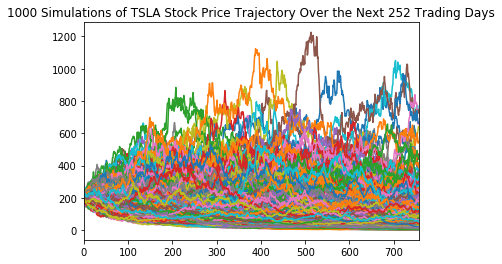

In [9]:
# Use the `plot` function to plot the trajectory of TSLA stock based on a 252 trading day simulation


In [10]:
# Select the last row for project stock prices (prices of each simulation on the 252nd trading day)


Simulation 1     16.946903
Simulation 2     20.340424
Simulation 3     16.327336
Simulation 4     72.826440
Simulation 5    107.695871
Name: 756, dtype: float64

### Plot the Frequency Distribution of Simulated Ending Prices on 252nd Trading Day

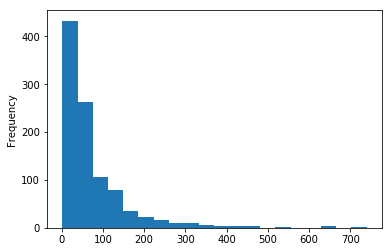

In [11]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices


### Calculate Lower and Upper Bounds of 95% Confidence Interval for Simulated Ending Stock Prices of TSLA

In [12]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending prices


0.025      6.355741
0.975    314.984543
Name: 756, dtype: float64

### Plot the Probability Distribution and 95% Confidence Interval of Simulated Ending Prices 

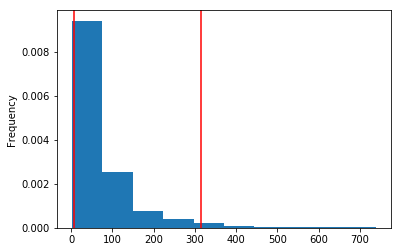

In [13]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval


### Calculate 95% Confidence Interval of An Initial Investment of 10,000 in TSLA over the Next 252 Trading Days

In [14]:
# Set initial investment


# Calculate cumulative profit/loss of lower and upper bound


# Add the initial investment to the cumulative profit/loss of lower and upper bound


# Print the results


There is a 95% chance that an initial investment of $10,000 in TSLA over the next 252 trading days will end within in the range of $310.79417783187455 and $15402.667134992906
